## Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as MMScaler

%matplotlib inline

In [4]:
data_set_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx'

In [21]:
# читаем датасет. опускаем колонку даты
df = pd.read_excel(data_set_url).set_index('No').drop('X1 transaction date', axis=1)
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
410,13.7,4082.01500,0,24.94155,121.50381,15.4
411,5.6,90.45606,9,24.97433,121.54310,50.0
412,18.8,390.96960,7,24.97923,121.53986,40.6


# Скалирование данных
Используем MinMax скалирование для приведения данных в диапазон [-1; 1]

In [102]:
mm_scaler = MMScaler(feature_range=(-1, 1))
proc_df = mm_scaler.fit_transform(df)
proc_df = pd.DataFrame(proc_df, columns=df.columns)
proc_df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...
409,-0.374429,0.255641,-1.0,-0.770238,-0.346992,-0.858053
410,-0.744292,-0.979249,0.8,0.024237,0.500323,-0.228389
411,-0.141553,-0.886278,0.4,0.142996,0.430451,-0.399454
412,-0.630137,-0.974808,0.0,-0.159719,0.447919,-0.182894


# Обработка пропусков и выбросов
* удаляем все выбросы
* удаляем пустые значения

<AxesSubplot:>

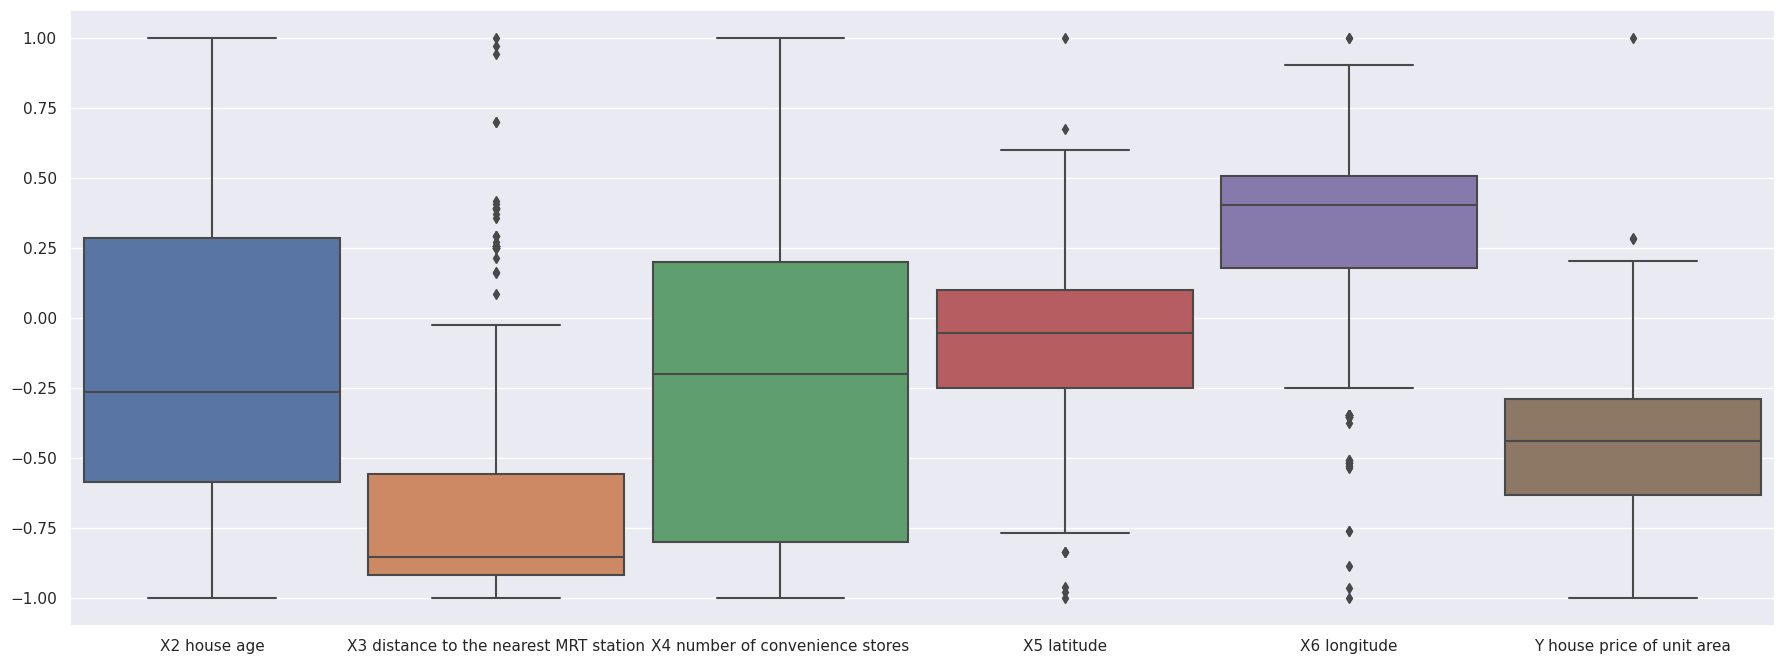

In [103]:
sns.set(rc={'figure.figsize':(22,8)})
sns.boxplot(data=proc_df, width=0.9)

In [107]:
print("До очистки ", proc_df.shape)

proc_df = proc_df[(np.abs(stats.zscore(proc_df)) < 3).all(axis=1)]
proc_df = proc_df.dropna()

print("После очистки ", proc_df.shape)

До очистки  (414, 6)
После очистки  (407, 6)


<AxesSubplot:>

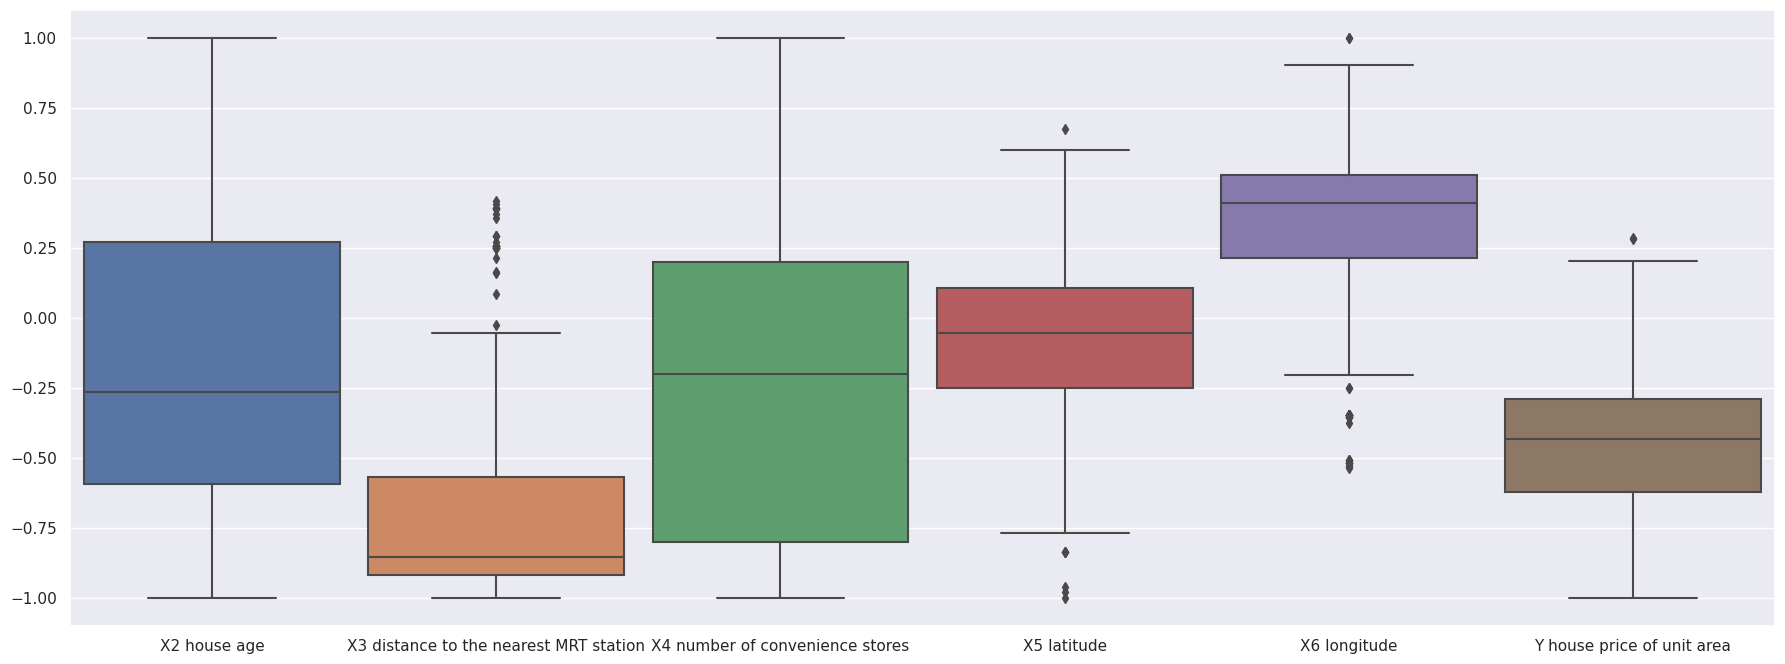

In [108]:
sns.boxplot(data=proc_df, width=0.9)

Выбросов стало меньше, но они все еще есть. Если я правильно понял, то это нормально?..

# Матрица корреляции

In [114]:
correlation_matrix = proc_df.corr()
correlation_matrix

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.007039,0.057119,0.075027,-0.022561,-0.202244
X3 distance to the nearest MRT station,-0.007039,1.000000,-0.618373,-0.631557,-0.769217,-0.691075
X4 number of convenience stores,0.057119,-0.618373,1.000000,0.458272,0.439598,0.604845
X5 latitude,0.075027,-0.631557,0.458272,1.000000,0.408213,0.569685
X6 longitude,-0.022561,-0.769217,0.439598,0.408213,1.000000,0.522886
Y house price of unit area,-0.202244,-0.691075,0.604845,0.569685,0.522886,1.000000


<AxesSubplot:>

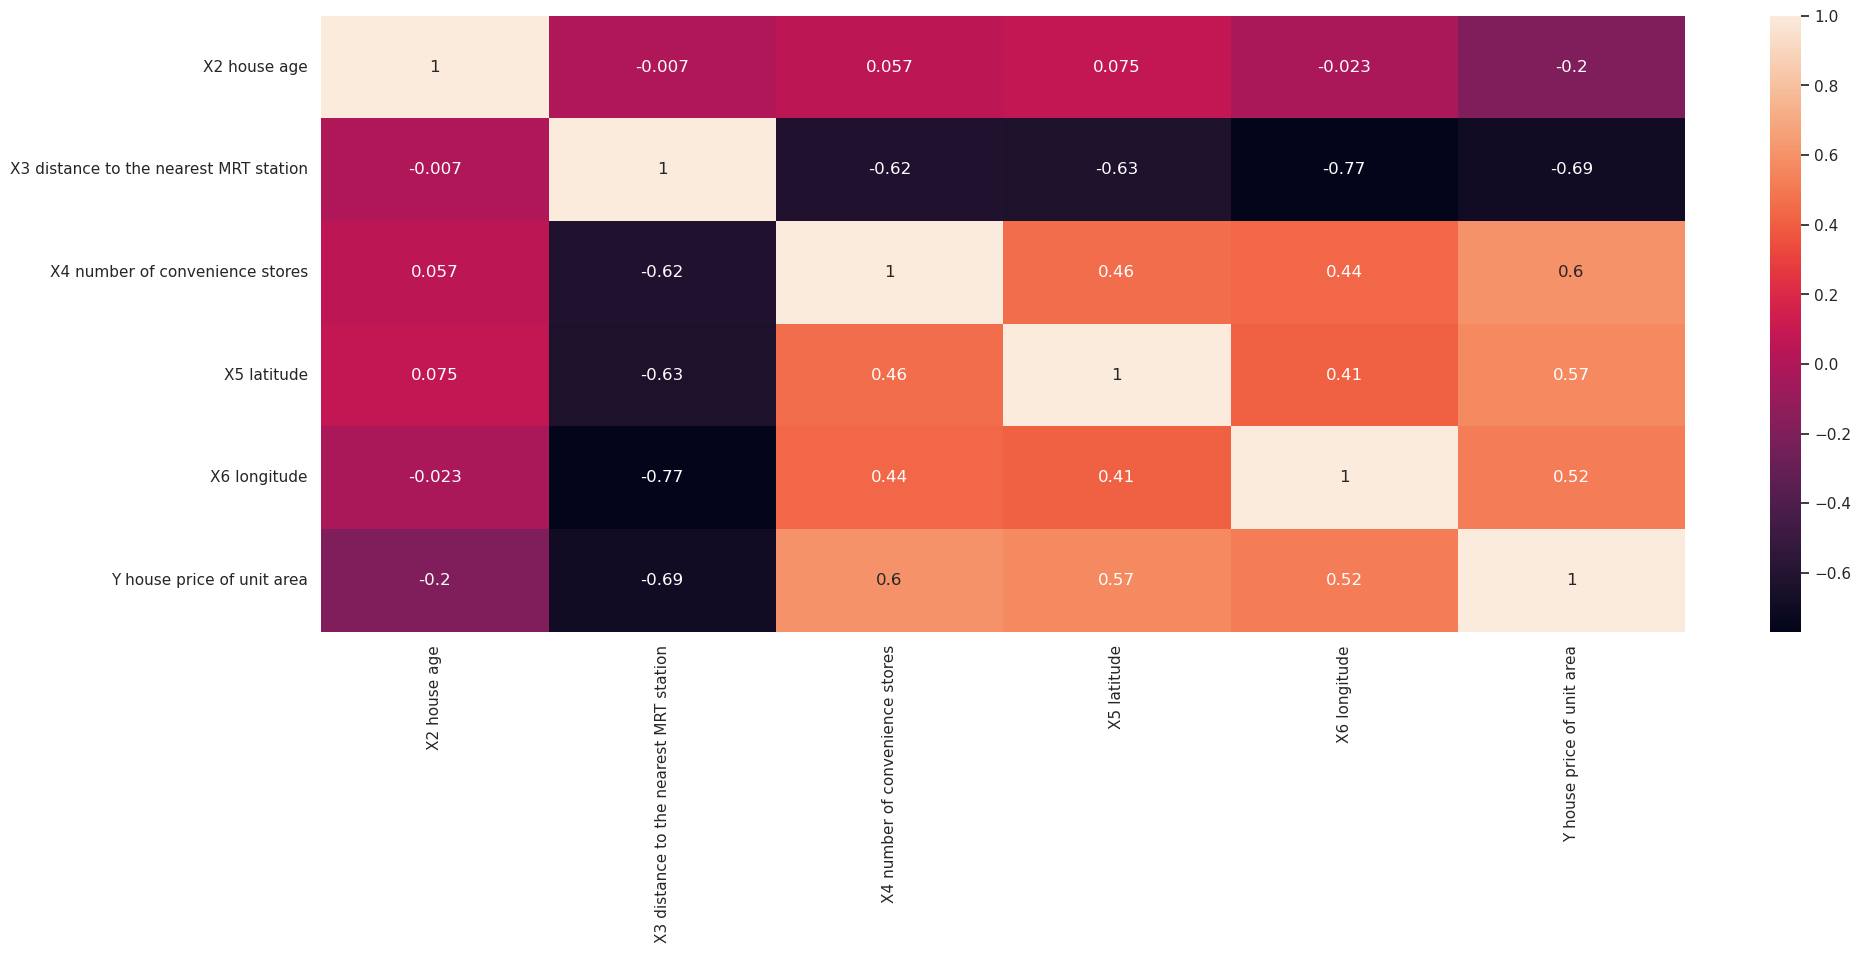

In [115]:
sns.heatmap(correlation_matrix, annot=True)

По матрице можно сделать вывод, что стоимость квадратного метра квартиры(`Y`) сильно зависит от близости квартиры до метро(`X3`). Кроме того, есть чуть меньшая зависимость цены метра(`Y`) от количества магазинов рядом с квартирой(`X4`) и расположения(`X5`, `X6`). Возраст квартиры(`X2`) же на стоимость квартиры(`Y`) почти не влияет.

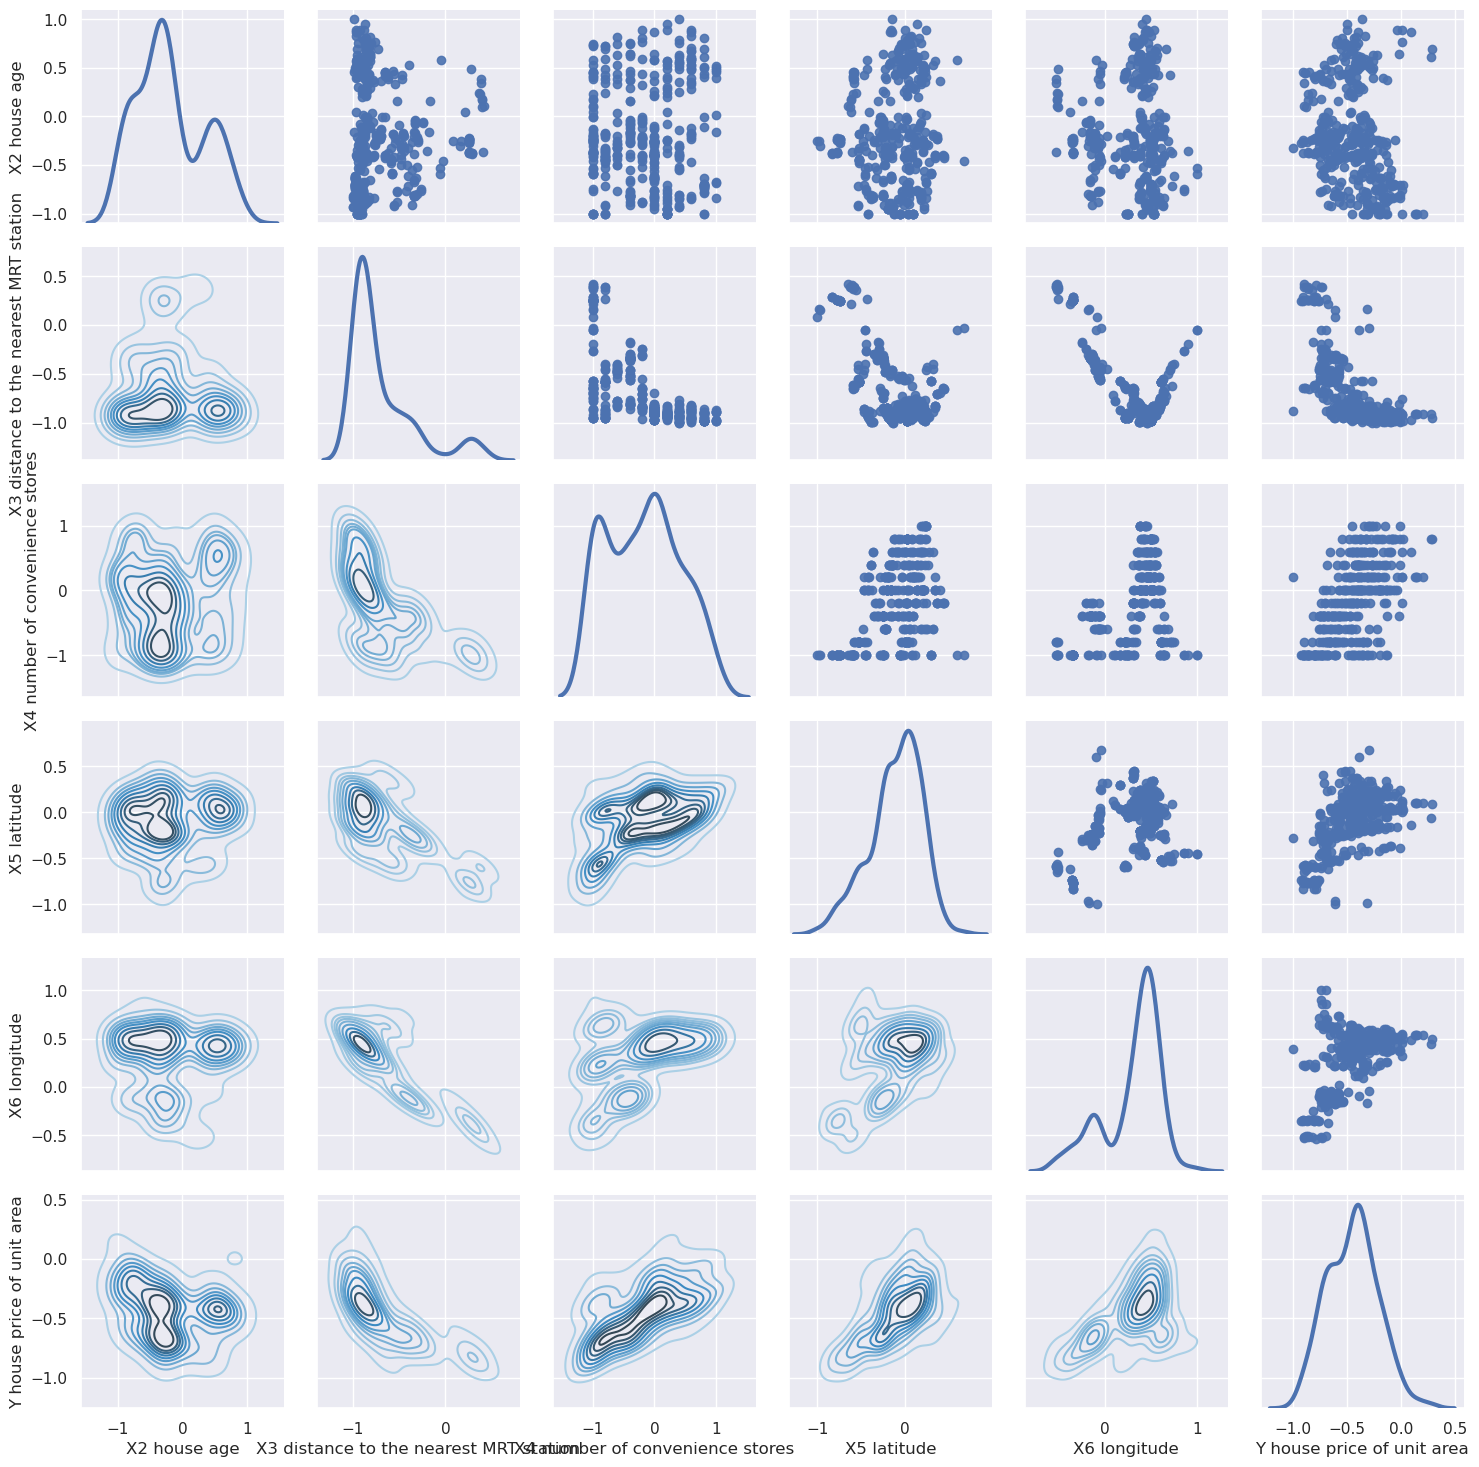

In [113]:
g = sns.PairGrid(proc_df, diag_sharey=False,)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.9)
g.map_diag(sns.kdeplot, lw=3)

In [122]:
def print_is_normal(dataset, column):
    stat, p = stats.normaltest(dataset[column])
    
    alpha = 0.05
    if p > alpha:
        print(f"{column}: Принять гипотезу о нормальности")
    else:
        print(f"{column}: Отклонить гипотезу о нормальности")

for column in proc_df:
    print_is_normal(proc_df, column)

X2 house age: Отклонить гипотезу о нормальности
X3 distance to the nearest MRT station: Отклонить гипотезу о нормальности
X4 number of convenience stores: Отклонить гипотезу о нормальности
X5 latitude: Отклонить гипотезу о нормальности
X6 longitude: Отклонить гипотезу о нормальности
Y house price of unit area: Принять гипотезу о нормальности
